In [ ]:

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from tensorflow.keras.utils import plot_model


In [ ]:


def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 256, 256, 64) 256         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 128 3584        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 256, 256, 32) 2432        input_2[0][0]                    
____________________________________________________________________________________________

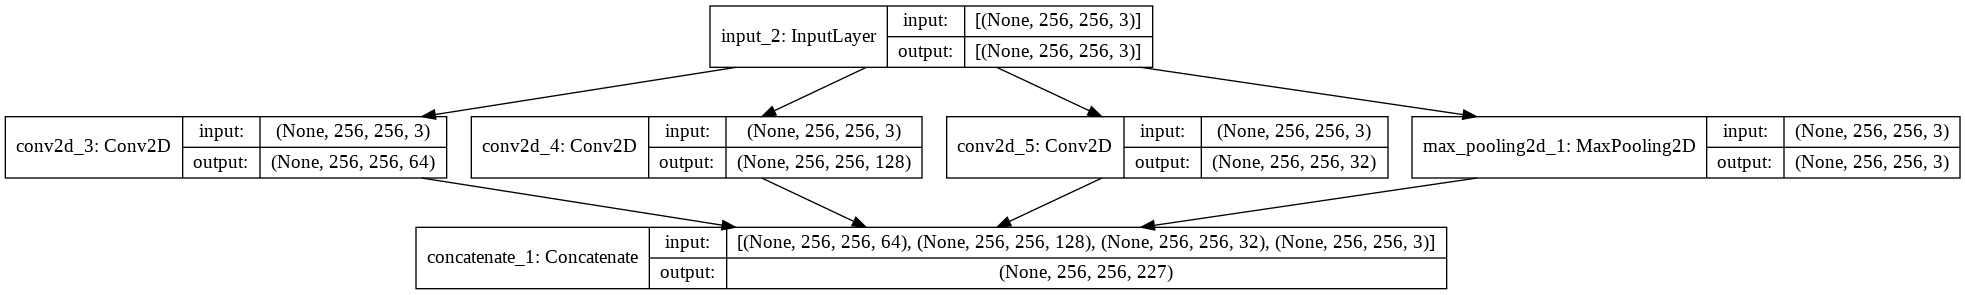

In [ ]:
# define model input
visible = Input(shape=(256, 256, 3))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')


The module basically acts as multiple convolution filters, that are applied to the same input, with some pooling. The results are then concatenated. This allows the model to take advantage of multi-level feature extraction .Using multiple features from multiple filters improve the performance of the network. Other than that, there is another fact that makes the inception architecture better than others. All the architectures prior to inception, performed convolution on the spatial and channel wise domain together. By performing the 1x1 convolution, the inception block is doing cross-channel correlations, ignoring the spatial dimensions. This is followed by cross-spatial and cross-channel correlations via the 3x3 and 5x5 filters.

The Inception Module is based on a pattern recognition network which mimics the animal visual cortex.

In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path_inception = f"{getcwd()}/../content/drive/My Drive/Quiz4_inception/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top  = False,
                               weights      = 'imagenet')



# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
      layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 74, 74, 32)   96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 74, 74, 32)   0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation = 'sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 74, 74, 32)   96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 74, 74, 32)   0           batch_normalization_376[0][0]    
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#Getting the dataset from the drive
path_dataset = f"{getcwd()}/../content/drive/My Drive/Quiz4_inception/Dataset.zip"

In [ ]:
#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

#Defining dataset path and finding number of files
import os 
EOSINOPHIL= os.path.join('../content/Dataset\Blood_Cell_Images\images\TEST\EOSINOPHIL')
LYMPHOCYTE = os.path.join('../content/Dataset\Blood_Cell_Images\images\TEST\LYMPHOCYTE')


Done


In [ ]:
#List of Apple and Banana Images
EOSINOPHIL_files = os.listdir(EOSINOPHIL)
print(EOSINOPHIL_files[:10])
Banana_files = os.listdir(Banana)
print(Banana_files[:10])

FileNotFoundError: ignored

In [ ]:
#Train-Test Partitioning
from glob import glob
import os.path
from shutil import copy2

path = '../content/Dataset'
test = '../content/Test'
train = '../content/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)
 
for folder in glob(path+'/*'):
		print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)

In [ ]:

# Define our example directories and files
train_dir = '/content/Train'
validation_dir = '/content/Test'

train_apple_dir = os.path.join(train_dir,'EOSINOPHIL')
train_banana_dir = os.path.join(train_dir,'LYMPHOCYTE')
validation_apple_dir = os.path.join(validation_dir,'EOSINOPHIL')
validation_banana_dir = os.path.join(validation_dir,'LYMPHOCYTE')

train_apple_fnames = os.listdir(train_EOSINOPHIL_dir)
train_banana_fnames = os.listdir(train_LYMPHOCYTE_dir)
validation_apple_fnames = os.listdir(validation_EOSINOPHIL_dir)
validation_banana_fnames = os.listdir(validation_LYMPHOCYTE_dir)

print(len(train_EOSINOPHIL_fnames))
print(len(train_LYMPHOCYTE_fnames))
print(len(validation_EOSINOPHIL_fnames))
print(len(validation_LYMPHOCYTE_fnames))



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')



In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.0%
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:



callbacks = myCallback()
history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch = 10,
                             epochs = 3,
                             validation_steps = 10,
                             verbose = 1,
                             callbacks=[callbacks])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()